In [1]:
import pandas as pd
import seaborn as sns


# Modelling libraries
#import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")


# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data= pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
#student_data


Draw a dispersion diagram (scatter plot) for the data.

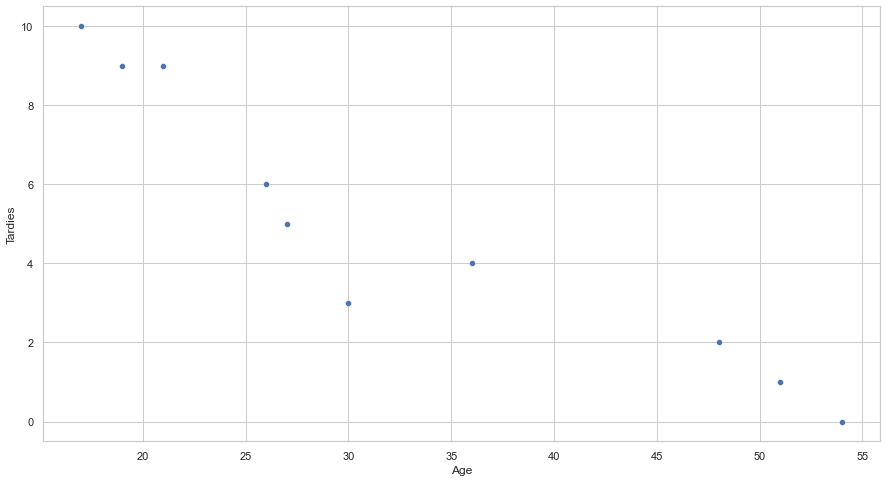

In [3]:
sns.scatterplot(x = "Age", y="Tardies", data = student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
"""
- Yes, a negative linear trend can be observed in the resulting values, 
indicating that there is a downward relationship between the variables. 
- Negative slope indicates that as the value of an independent variable 
increases, the corresponding value of the dependent variable tends to 
decrease proportionally. 
This negative linear trend suggests an inverse relationship between the 
variables under study.

Hipothesis: The older they are, the less time they are late and vice versa.

"""

'\n- Yes, a negative linear trend can be observed in the resulting values, \nindicating that there is a downward relationship between the variables. \n- Negative slope indicates that as the value of an independent variable \nincreases, the corresponding value of the dependent variable tends to \ndecrease proportionally. \nThis negative linear trend suggests an inverse relationship between the \nvariables under study.\n\nHipothesis: The older they are, the less time they are late and vice versa.\n\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


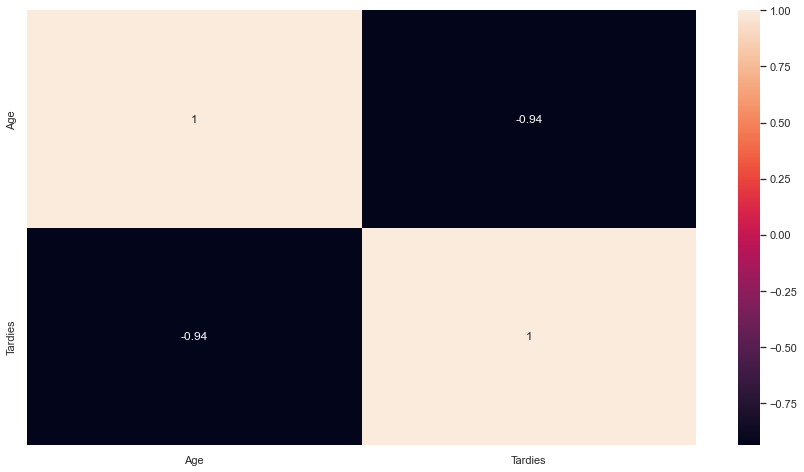

In [6]:
sns.heatmap(student_data.corr(), annot=True);

In [7]:
"""
The correlation indicates the strength of the relationship between variables taking a value of -1 to 1.
- In this case there is a strong relationship between variables since the value is prone to -1 (-0.939163).
The relationship is negative, since if one variable increases, the other decreases.
"""

'\nThe correlation indicates the strength of the relationship between variables taking a value of -1 to 1.\n- In this case there is a strong relationship between variables since the value is prone to -1 (-0.939163).\nThe relationship is negative, since if one variable increases, the other decreases.\n'

In [8]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [9]:
"""
The covariance indicates how the two variables change simultaneously. 
In this case it indicates that the variables tend to move in opposite directions, 
that is, when one variable increases, the other tends to decrease.
"""

'\nThe covariance indicates how the two variables change simultaneously. \nIn this case it indicates that the variables tend to move in opposite directions, \nthat is, when one variable increases, the other tends to decrease.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
lr = LinearRegression()

In [11]:
# Regression task: summarize & predict

lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies) # target variable / to be predicted / dependant / what we don't know 



LinearRegression()

In [12]:
coef_ = lr.coef_
coef_

array([-0.24282077])

In [13]:
intercept_ = lr.intercept_
intercept_

12.888803363135771

In [14]:
def predicted_delay (Age):
    coef_ = lr.coef_
    intercept_ = lr.intercept_
    result =  Age * coef_ + intercept_
    
    return result[0]

In [15]:
student_data["prediction_delay_scikit"] = student_data["Age"].apply(predicted_delay)

In [16]:
student_data["error_scikit"] = (student_data.prediction_delay_scikit - student_data.Tardies)
student_data

,Age,Tardies,prediction_delay_scikit,error_scikit
0,17,10,8.760850,-1.239150
1,51,1,0.504944,-0.495056
2,27,5,6.332643,1.332643
3,21,9,7.789567,-1.210433
4,36,4,4.147256,0.147256
5,48,2,1.233406,-0.766594
6,19,9,8.275209,-0.724791
7,26,6,6.575463,0.575463
8,54,0,-0.223518,-0.223518
9,30,3,5.604180,2.604180


Plot your regression model on your scatter plot.

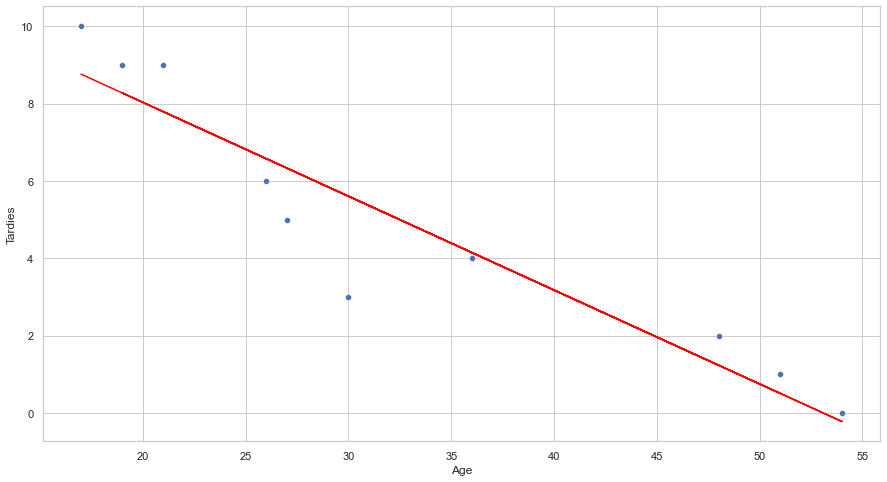

In [17]:
sns.scatterplot(x = "Age", y="Tardies", data = student_data);
plt.plot(student_data.Age, student_data["prediction_delay_scikit"], c="red", label="Prediction 1 - MAE: 12")


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
RSS = ((student_data.prediction_delay_scikit - student_data.Tardies) ** 2).sum()
RSS

13.319201847356268

In [19]:
TSS = ((student_data.prediction_delay_scikit - student_data.Tardies.mean()) ** 2).sum()
TSS

99.58079815264381

In [20]:
r_2 = 1 - RSS/TSS
r_2

0.8662472876855261

In [21]:
"""
This model explains 86% of the variance of our data
"""

'\nThis model explains 86% of the variance of our data\n'

In [22]:
X = student_data[["Age"]]
y = student_data.Tardies

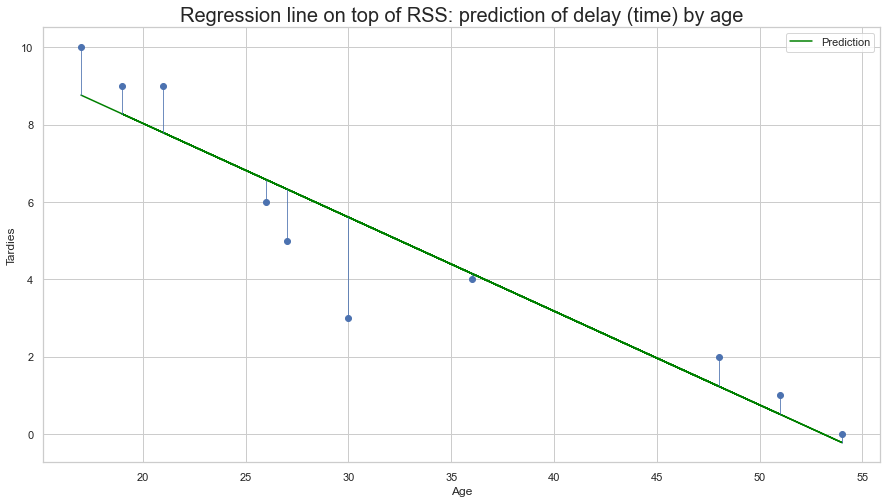

In [23]:
plt.scatter(X, y)
plt.plot(student_data.Age, student_data["prediction_delay_scikit"], c="green", label="Prediction")
plt.vlines(X,  student_data["prediction_delay_scikit"], y, lw=0.8)
plt.title("Regression line on top of RSS: prediction of delay (time) by age", size=20)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend();

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
veh = pd.read_csv ('../../lectures/datasets/vehicles.csv')

In [25]:
veh.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [26]:
veh.rename(columns={'Fuel Barrels/Year': 'Fuel_barrel_year'}, inplace=True)
veh.rename(columns={'Combined MPG': 'Combined_MPG'}, inplace=True)
veh = veh[["Year", "Cylinders", "Fuel_barrel_year", "Combined_MPG", "Fuel Cost/Year"]]
veh

,Year,Cylinders,Fuel_barrel_year,Combined_MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550
...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100
35948,2014,3.0,9.155833,36,1100
35949,2015,3.0,9.155833,36,1100
35950,2016,3.0,9.155833,36,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [27]:
veh.corr()

,Year,Cylinders,Fuel_barrel_year,Combined_MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel_barrel_year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


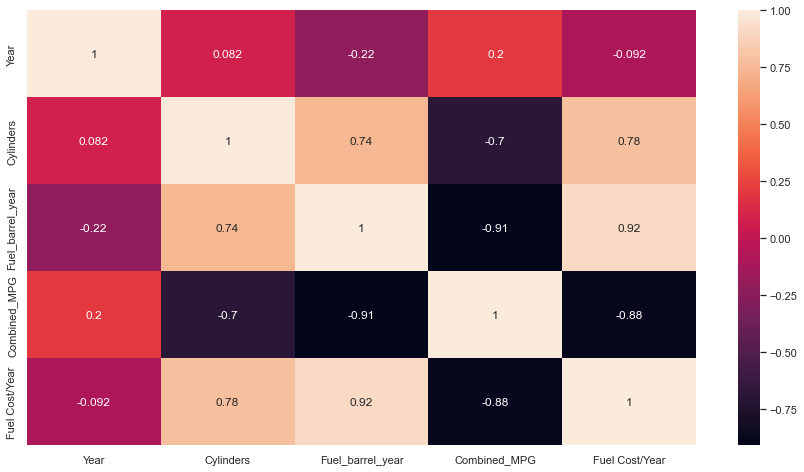

In [28]:
sns.heatmap(veh.corr(), annot=True);

In [29]:
"""
(+)
Fuel Cost/Year - Fuel Barrels/Year (0.916208) 
Combined MPG - Fuel Barrels/Year (-0.909743) <-- SELECTED¿?
Combined MPG - Fuel Cost/Year (-0.875185)

Cylinders - Fuel Barrels/Year (0.739517)
Cylinders - Fuel Cost/Year (0.778153)


(-)
Year - Cylinders (0.082469)
Year - Fuel Barrels/Year (-0.221084)
Year - Combined MPG ('0.204751')
Year - Fuel Cost/Year (-0.091913)


* Fuel Barrels/Year 
cantidad de combustible consumido en barriles por año
a mayor consumo de combustible quemado --> mayores emisiones de CO2,

* Combined MPG
eficiencia de combustible
a mayor valor de MPG --> mejor eficiencia de combustible (menos consumo combustible)

"""

"\n(+)\nFuel Cost/Year - Fuel Barrels/Year (0.916208) \nCombined MPG - Fuel Barrels/Year (-0.909743) <-- SELECTED¿?\nCombined MPG - Fuel Cost/Year (-0.875185)\n\nCylinders - Fuel Barrels/Year (0.739517)\nCylinders - Fuel Cost/Year (0.778153)\n\n\n(-)\nYear - Cylinders (0.082469)\nYear - Fuel Barrels/Year (-0.221084)\nYear - Combined MPG ('0.204751')\nYear - Fuel Cost/Year (-0.091913)\n\n\n* Fuel Barrels/Year \ncantidad de combustible consumido en barriles por año\na mayor consumo de combustible quemado --> mayores emisiones de CO2,\n\n* Combined MPG\neficiencia de combustible\na mayor valor de MPG --> mejor eficiencia de combustible (menos consumo combustible)\n\n"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [30]:
lr_veh = LinearRegression()

In [31]:
lr_veh.fit(
    X = veh[["Combined_MPG"]],
    y = veh.Fuel_barrel_year) # target variable / to be predicted / dependant / what we don't know 

LinearRegression()

In [32]:
def predicted_emissions (Combined_MPG):
    coef_ = lr_veh.coef_
    intercept_ = lr_veh.intercept_
    result =  Combined_MPG * coef_ + intercept_
    
    return result[0]

In [33]:
veh["prediction_emissions_scikit"] = veh["Combined_MPG"].apply(predicted_emissions)

In [34]:
veh["error_scikit"] = (veh.prediction_emissions_scikit - veh.Fuel_barrel_year)

In [35]:
veh.sample()

,Year,Cylinders,Fuel_barrel_year,Combined_MPG,Fuel Cost/Year,prediction_emissions_scikit,error_scikit
29371,1993,4.0,18.311667,18,2250,19.142758,0.831092


In [36]:
RSS = ((veh.prediction_emissions_scikit - veh.Fuel_barrel_year) ** 2).sum()
RSS

123667.36633702302

In [37]:
TSS = ((veh.prediction_emissions_scikit - veh.Fuel_barrel_year.mean()) ** 2).sum()
TSS

593792.885121986

In [38]:
r_2 = 1 - RSS/TSS
r_2

0.7917331624618281

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
X = veh[["Combined_MPG"]]
y = veh.Fuel_barrel_year

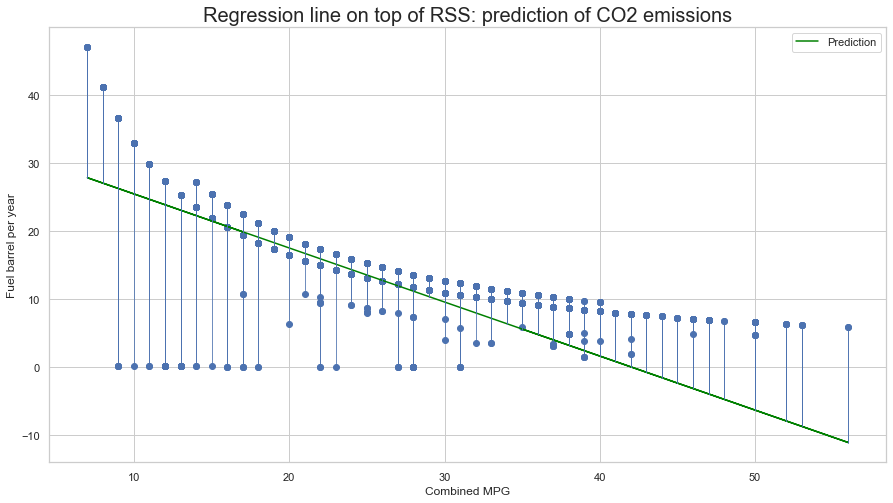

In [40]:
plt.scatter(X, y)
plt.plot(veh.Combined_MPG, veh["prediction_emissions_scikit"], c="green", label="Prediction")
plt.vlines(X,  veh["prediction_emissions_scikit"], y, lw=0.8)
plt.title("Regression line on top of RSS: prediction of CO2 emissions", size=20)
plt.xlabel('Combined MPG')
plt.ylabel('Fuel barrel per year')
plt.legend();

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [65]:
party_data= pd.DataFrame({'people_invited': [1,3,4,6,8,9,11,14], 'people_partying': [1,2,4,4,5,7,8,13]})
party_data.sample()


,people_invited,people_partying
3,6,4


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [66]:
lr_party = LinearRegression()

In [67]:
lr_party.fit(
    X = party_data[["people_invited"]],
    y = party_data.people_partying) # target variable / to be predicted / dependant / what we don't know 

LinearRegression()

In [68]:
def predicted_people (people_invited):
    coef_ = lr_party.coef_
    intercept_ = lr_party.intercept_
    result =  people_invited * coef_ + intercept_
    
    return result[0]

In [69]:
party_data["prediction_people_scikit"] = party_data["people_invited"].apply(predicted_people)
party_data["error_scikit"] = (party_data.prediction_people_scikit - party_data.people_partying)
party_data

,people_invited,people_partying,prediction_people_scikit,error_scikit
0,1,1,0.409091,-0.590909
1,3,2,2.106061,0.106061
2,4,4,2.954545,-1.045455
3,6,4,4.651515,0.651515
4,8,5,6.348485,1.348485
5,9,7,7.196970,0.196970
6,11,8,8.893939,0.893939
7,14,13,11.439394,-1.560606


In [70]:
X = party_data[["people_invited"]]
y = party_data.people_partying

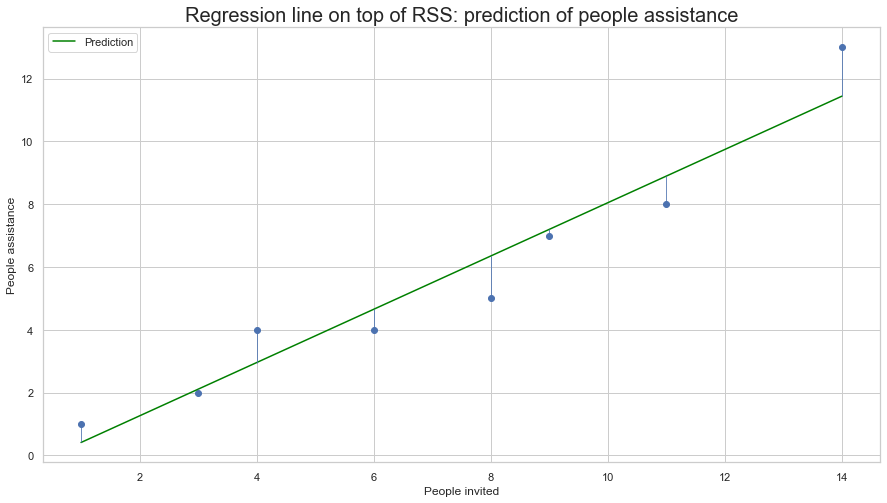

In [75]:
plt.scatter(X, y)
plt.plot(party_data.people_invited, party_data["prediction_people_scikit"], c="green", label="Prediction")
plt.vlines(X,  party_data["prediction_people_scikit"], y, lw=0.8)
plt.title("Regression line on top of RSS: prediction of people assistance", size=20)
plt.xlabel('People invited')
plt.ylabel('People assistance')
plt.legend();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [72]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [44]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [45]:
# Your response here. 